In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
import pandas as pd

In [4]:
from vagusNerve.utils import *
from vagusNerve.runSim import *
from vagusNerve.phiShape import *
from vagusNerve.phiWeight import *
from vagusNerve.nerveSetup import *
from vagusNerve.recruitment import *

In [5]:
import matplotlib 
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [6]:
def maxVal(d):
    
    a = 4.3e6 # Velocity = a * d (Hz)
    
    wV = 5e-5 # Width of AP in time (seconds)
    
    Vp = 0.05 # Height of AP (Volts)
    
    PhiP = 1 # Height of sensitivity function (Volts/Amp)
    
    sigma = 1/0.7 # Axial conductivity (S/m)
    
    wPhi = 0.001 # Width of sensitivity function (m)
    
    
    maxval = a * d**3 *PhiP * np.pi * Vp * wPhi * wV * sigma / ( 2*np.exp(3/2)*(wPhi**2 +a**2*d**2*wV**2)**(3/2) )
    
    return maxval

In [13]:
def Gaussian(t,amp,width,offset=0):
    
    return amp * np.exp(-(t-offset)**2/(2*width**2))

def myelinatedAP(t):
    
    wV = 5e-5 # Width of AP in time (seconds)
    Vp = 0.08 # Height of AP (Volts)
    
    return Gaussian(t,Vp,wV)

def unmyelinatedAP(t):
    
    wV = 2e-4 # Width of AP in time (seconds)
    
    Vp = 0.08 # Height of AP (Volts)
    
    return Gaussian(t,Vp,wV)

def sensitivity(x,offset=0):
    PhiP = 1 # Height of sensitivity function (Volts/Amp)
    wPhi = 0.001 # Width of sensitivity function (m)
    
    return Gaussian(x,PhiP,wPhi,offset)

In [8]:
def maxValU(d):
    
    a = 465 # Velocity = a * sqrt(d) (m^.5 Hz)
    
    wV = 2e-4 # Width of AP in time (seconds)
    
    Vp = 0.08 # Height of AP (Volts)
    
    PhiP = 1 # Height of sensitivity function (Volts/Amp)
    
    sigma = 1 # Axial conductivity (S/m)
    
    wPhi = 0.001 # Width of sensitivity function (m)
    
    
    maxval = a * d**(5/2) *PhiP * np.pi * Vp * wPhi * wV * sigma / ( 2*np.exp(3/2)*(wPhi**2 + a**2 * d * wV**2)**(3/2) )
    
    return maxval

In [9]:
d = np.linspace(0.1,15,2000)*1e-6

In [10]:
timeMyelin = np.linspace(0,0.002,2000)
timeUnmyelin = np.linspace(0,0.1,2000)
myelinatedSeparate = np.genfromtxt('capMyelinSeparate.dat')
myelinatedTogether = np.genfromtxt('capMyelinTogether.dat')
unmyelinatedSeparate = np.genfromtxt('capUnmyelinSeparate.dat')
unmyelinatedTogether = np.genfromtxt('capUnmyelinTogether.dat')

In [11]:
ap = pd.read_excel('../data/APShape20.xlsx') # Rat, 20 um
peakLoc = np.argmax(ap.iloc[:,1])

apU = pd.read_excel('../data/APShapePoint8.xlsx') # Sundt, 0.8 um
peakLocU = np.argmax(apU.iloc[:,1])

In [14]:
femDirectory = '../data/PhiConductivity_Bipolar_Corrected/'
phi = pd.read_excel(femDirectory+str(0)+'_BetterConductivity.xlsx')
peakPhiLoc = np.argmax(phi.iloc[:,1])
minPhiLoc = np.argmin(phi.iloc[:,1])

In [ ]:
phi

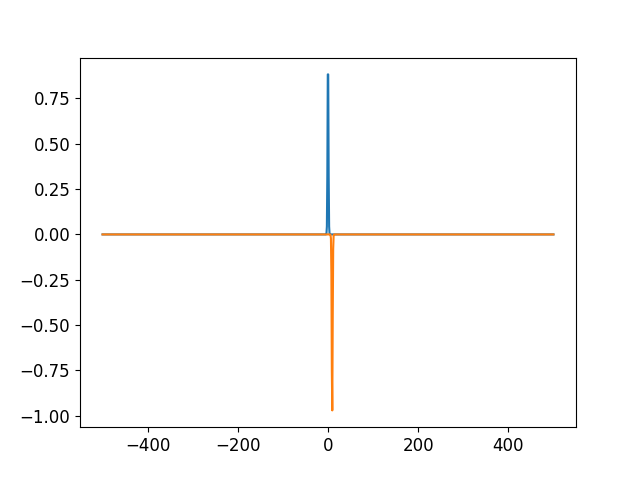

In [36]:
plt.figure()
plt.plot(np.linspace(-.5,.5,1000)*1e3,sensitivity(np.linspace(-.5,.5,1000)))
plt.plot(np.linspace(-.5,.5,1000)*1e3,-sensitivity(np.linspace(-.5,.5,1000),phi.iloc[minPhiLoc,0]-phi.iloc[peakPhiLoc,0]))

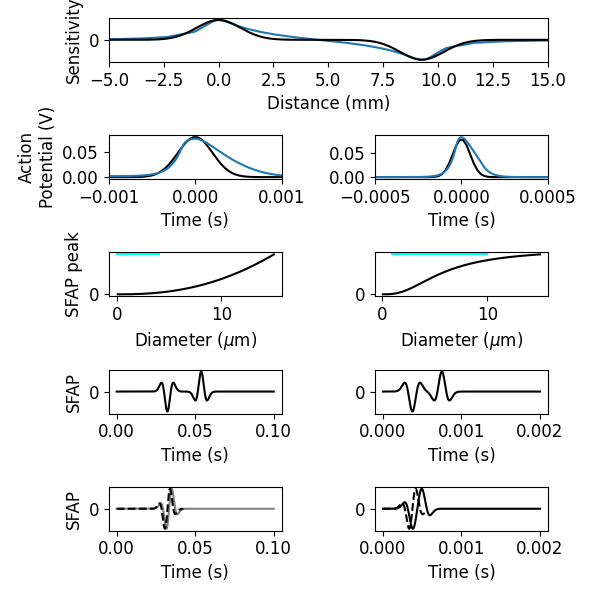

In [40]:

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(5, 2, figure=fig)

# Top subplot spanning both columns
ax0 = fig.add_subplot(gs[0, :])  # row 0, all columns

plt.plot((phi.iloc[:,0]-phi.iloc[peakPhiLoc,0])*1e3,phi.iloc[:,1]/np.max(phi.iloc[:,1]))

plt.plot(np.linspace(-.05,.05,1000)*1e3,sensitivity(np.linspace(-.05,.05,1000))-sensitivity(np.linspace(-.05,.05,1000),phi.iloc[minPhiLoc,0]-phi.iloc[peakPhiLoc,0]),'k')

plt.xlabel('Distance (mm)')
plt.ylabel('Sensitivity')
plt.xlim([-5,15])
ax0.set_yticks([0])

ax = fig.add_subplot(gs[1, 0])  # row 0, all columns
plt.plot(np.linspace(-1,1)*1e-3,unmyelinatedAP(np.linspace(-1,1)*1e-3),'k')

plt.plot(apU.iloc[:,0]-apU.iloc[peakLocU,0],apU.iloc[:,1]-np.min(apU.iloc[:,1]))
plt.xlabel('Time (s)')
plt.xlim([-1e-3,1e-3])
plt.ylabel('Action\nPotential (V)')

fig.add_subplot(gs[1, 1])  # row 0, all columns
plt.plot(np.linspace(-.5,0.5)*1e-3,myelinatedAP(np.linspace(-.5,0.5)*1e-3),'k')
plt.plot(ap.iloc[:,0]-ap.iloc[peakLoc,0],ap.iloc[:,1]-np.min(ap.iloc[:,1]))
plt.xlabel('Time (s)')
plt.xlim([-.5e-3,.5e-3])

ax = fig.add_subplot(gs[2, 0])  # row 0, all columns
plt.plot(d*1e6,maxValU(d)/np.max(maxValU(d)),'k')
plt.plot([0,4],[1,1],'cyan')
ax.set_yticks([0])
plt.xlabel('Diameter ($\mu$m)')
plt.ylabel('SFAP peak')

ax = fig.add_subplot(gs[2, 1])  # row 0, all columns
plt.plot(d*1e6,maxVal(d)/np.max(maxVal(d)),'k')
plt.plot([1,10],[1,1],'cyan')
ax.set_yticks([0])
plt.xlabel('Diameter ($\mu$m)')

ax = fig.add_subplot(gs[3, 0])  # row 0, all columns
plt.plot(timeUnmyelin,unmyelinatedSeparate[:-1]/np.max(unmyelinatedSeparate[:-1]),'k')
plt.ylabel('SFAP')
plt.xlabel('Time (s)')
ax.set_yticks([0])

ax = fig.add_subplot(gs[3, 1])  # row 0, all columns
plt.plot(timeMyelin,myelinatedSeparate[:-1]/np.max(myelinatedSeparate[:-1]),'k')
plt.xlabel('Time (s)')
ax.set_yticks([0])

derivM = np.diff(myelinatedSeparate[:570])/np.max(np.diff(myelinatedSeparate[:570]))

derivU = np.diff(unmyelinatedSeparate[:850])/np.max(np.diff(unmyelinatedSeparate[:850]))

ax = fig.add_subplot(gs[4, 0])  # row 0, all columns
plt.plot(timeUnmyelin,unmyelinatedTogether[:-1]/np.max(unmyelinatedTogether[:-1]),'grey')
plt.plot(timeUnmyelin[1:850],derivU,'k--')
plt.xlabel('Time (s)')
plt.ylabel('SFAP')
ax.set_yticks([0])

ax = fig.add_subplot(gs[4, 1])  # row 0, all columns
plt.plot(timeMyelin,myelinatedTogether[:-1]/np.max(myelinatedTogether[:-1]),'k')
plt.plot(timeMyelin[1:570],derivM,'k--')
ax.set_yticks([0])
plt.xlabel('Time (s)')

plt.tight_layout()

plt.savefig('analyticFig.png',dpi=600)

In [53]:
unmyelinatedTogether.shape

(2001,)